<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Malm24/blob/main/Actividad_Semanal_7_Regresiones_y_K_means_A01113135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Semanal -- 7 Regresiones y K means
Marco Antonio López Millán A01113135
Ciencia y analítica de datos (Gpo 10)
09/11/2022**

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

- Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
- Regresión Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Regresión Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
- Finalmente grafica :
-- MAE (de los cuatro métodos)
-- R2 (de los cuatro métodos)
-Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [ ]:

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.model_selection import train_test_split


## Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head(10)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

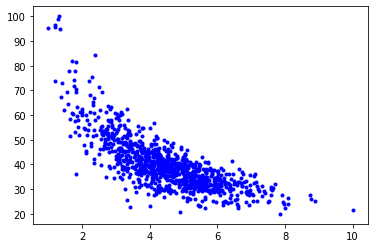

In [ ]:
plt.plot(X,y,'b.')

###Regresión Lineal

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #realizando división de datos en test y entrenamiento
listamae =[] #lista para mae
listar2 =[] #lista para r2

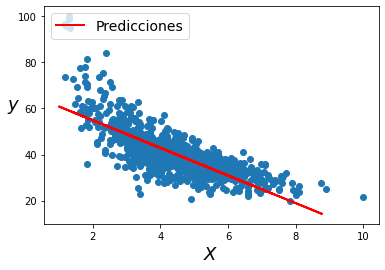

In [ ]:

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
X_fit = X_test#Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_fit = lr.predict(X_fit)
plt.scatter(X_train, y_train)
plt.plot(X_fit,y_fit, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
print('El modelo es: Y =', lr.coef_,'* X +', lr.intercept_)

El modelo es: Y = [-5.98882699] * X + 66.83650741226988


In [ ]:
mae_rls = metrics.mean_absolute_error(y_test,y_fit)
listamae.append(mae_rls) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_rls = r2_score(y_test,y_fit)
listar2.append(r2_rls)

print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_fit))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_fit)))

#la r cuadrada
print('r2_score:', r2_score(y_test,y_fit))

Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 7.108963321847682
r2_score: 0.6116251549562579


##Regresión Polinomial

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)


In [ ]:
lr.fit(X_poly_train, y_train)
lr.coef_, lr.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

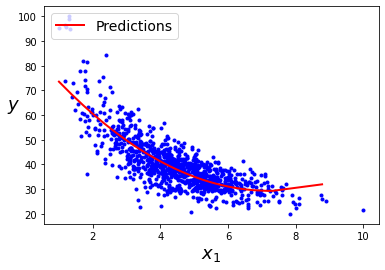

In [ ]:

X_poly_test = poly_features.transform(X_test)
y_new = lr.predict(X_poly_test)
order=np.argsort(X_test.values.ravel())
sortedXPoly= X_test.values.ravel()[order]
sortedYPoly= y_test.values.ravel()[order]
sorted_predicPoly = y_new[order]

plt.plot(X,y, "b.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

In [ ]:
print('El modelo es: Y =', lr.coef_[0],'X^2 +', lr.coef_[1],'X +',lr.intercept_)

El modelo es: Y = -16.406381017212386 X^2 + 1.1313609537119216 X + 88.80179909112496


In [ ]:
mae_rlp = metrics.mean_absolute_error(y_test,y_new)
listamae.append(mae_rlp) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_rlp = r2_score(y_test,y_new)
listar2.append(r2_rlp)

print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_new))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_new)))

#la r cuadrada
print('r2_score:', r2_score(y_test,y_new))

Error Medio Absoluto (MAE): 4.3833025759681075
Error Medio Cuadrado (RMSE): 5.832771301068423
r2_score: 0.7385501224942537


##Regresión con Ridge

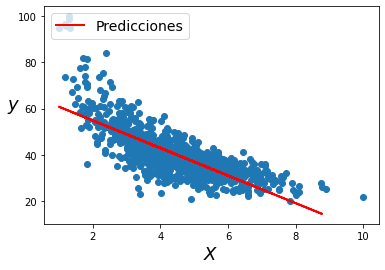

In [ ]:
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_ridge.fit(X_train, y_train)
X_ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_ridge = mi_ridge.predict(X_ridge)
plt.scatter(X, y)
plt.plot(X_ridge, y_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
print('El modelo es: Y =', mi_ridge.coef_,'* X +', mi_ridge.coef_)

El modelo es: Y = [-5.97003397] * X + [-5.97003397]


In [ ]:
mae_ridge = metrics.mean_absolute_error(y_test, y_ridge)
r2_ridge = r2_score(y_test, y_ridge)
print('Error medio Absoluto (MAE):', mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge)))
print('r2_score',r2_ridge)



Error medio Absoluto (MAE): 5.0162057389928325
Root Mean Squared Error: 7.1111119498200965
r2_score 0.6113903530239646


In [ ]:
listamae.append(mae_ridge)
listar2.append(r2_ridge)

##Regresión con Lasso

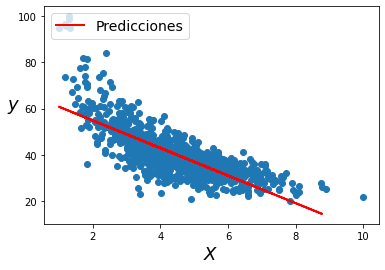

In [ ]:
mi_lasso = Lasso(alpha=0.1,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_lasso.fit(X_train, y_train)
X_lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_lasso = mi_ridge.predict(X_lasso)
plt.scatter(X, y)
plt.plot(X_lasso, y_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
print('El modelo es: Y =', mi_lasso.coef_,'* X +', mi_lasso.coef_)

El modelo es: Y = [-5.93216494] * X + [-5.93216494]


In [ ]:
mae_lasso = metrics.mean_absolute_error(y_test, y_lasso)
r2_lasso = r2_score(y_test, y_lasso)
print('Error medio Absoluto (MAE):', mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso)))
print('r2_score',r2_lasso)


Error medio Absoluto (MAE): 5.0162057389928325
Root Mean Squared Error: 7.1111119498200965
r2_score 0.6113903530239646


In [ ]:
listamae.append(mae_lasso)
listar2.append(r2_lasso)

##Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

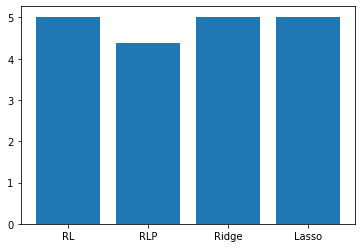

In [ ]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, listamae)
plt.show()

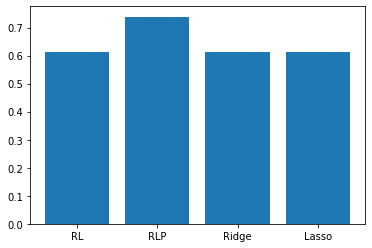

In [ ]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, listar2)
plt.show()

##Conclusiones Ejercicio 1

En este caso la regresión lineal polinomial es la que conviene más a la empresa pues su MAE (4.38) es el más pequeño de los cuatro modelos y su R^2 es de 0.7385 es la más cercana a 1.

En este caso se utilizó una conjunto de entrenamiento del 90% de la data original y un 10% fue utilizado para la evaluación.

una r cuadrada del 0.7385 nos dice que el 73.85% de la variabilidad observada en la variable es explicada por el modelo. Este resultados nos dice que si podemos hacer una buena aproximación. Sin embargo, aún tenemos oportunidad de encontrar mejores modelos que puedan explicar a un 80% o 90% de la variabilidad de los datos.





##Ejercicio 2

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 640 kB/s 
     |████████████████████████████████| 1.0 MB 14.2 MB/s 
     |████████████████████████████████| 1.7 MB 13.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 50.8 MB/s 
     |████████████████████████████████| 6.3 MB 36.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=5212b6043726848d0ac59cc755d0234b4e55a013bd0abc97a0f42a5bd1e5e848
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=58733cb7996c8a7a02a8e83ad344ae0ea5944b8f9fa064903f75868d35729e46
  Stored in directory: /root/.

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from sklearn.cluster import KMeans
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from pandas.core.internals.concat import concat_arrays

Importa la base de datos

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [ ]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

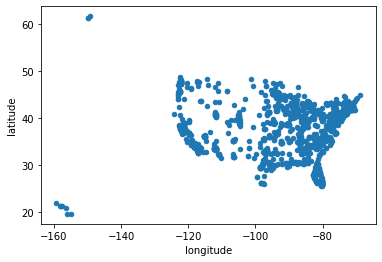

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

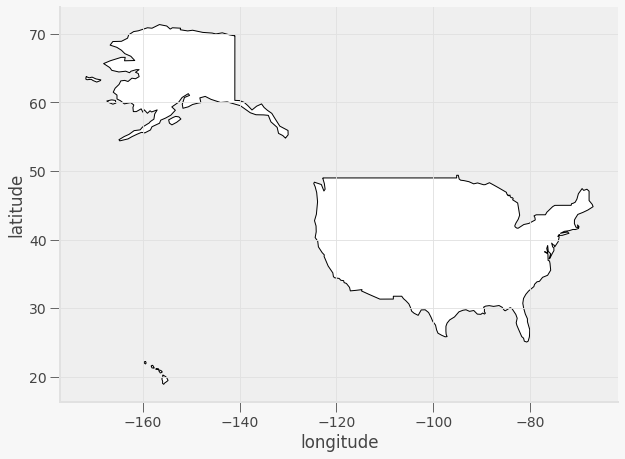

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

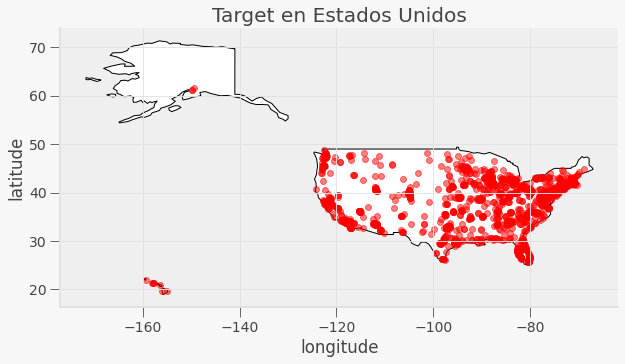

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

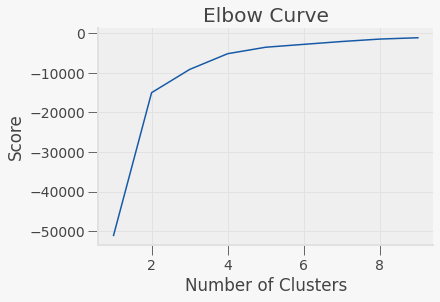

In [ ]:

K_clusters = range(1,10) #determinamos el rango de clusters a evaluar
kmeans = [KMeans(n_clusters=i) for i in K_clusters] #definiendo los clusters
Y_axis = latlong[['latitude']] #determinamos como eje y la latitud
X_axis = latlong[['longitude']] #determinamos como eje x la longitud
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] #calcula el score para cada "k" mean
# Visualizar nuestro elbow curve
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
X = df[["longitude","latitude"]] #definimos nuestra X con longitud y latitud
kmeans = KMeans(n_clusters=3).fit(X) #alimentamos el modelo par
centroids = kmeans.cluster_centers_ #determinamos los centro de los cluster
labels = kmeans.predict(X)

C = kmeans.cluster_centers_ #recopilamos el centro de nuestro datos

C_DF = pd.DataFrame(C) #creamos df 
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #definimos coordenadas como lista
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #convertimos en punto


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates") #creando geopandas df
gdf_C



,0,1,Coordinates
0,-93.327172,37.980063,POINT (-93.32717 37.98006)
1,-78.569908,37.789554,POINT (-78.56991 37.78955)
2,-118.624473,37.487342,POINT (-118.62447 37.48734)


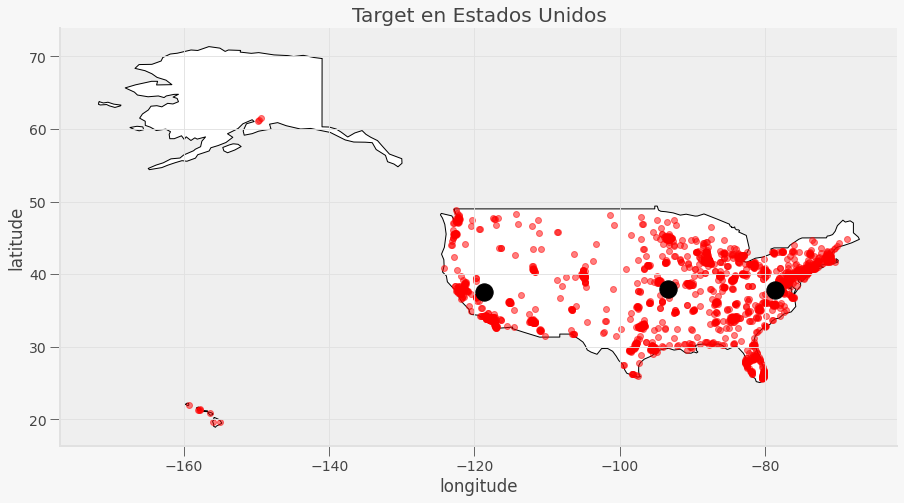

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') #grafica datos originales


gdf.plot(ax=gax, color='red', alpha = 0.5)
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 300) #grafica los cluster

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


In [ ]:
#Conteo de tiendas por cada cluster
latlong['kmeans'] = kmeans.labels_ 
latlong.loc[:, 'kmeans'].value_counts() #contamos la cantidad de datos agrupados en cada clusters


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    826
0    628
2    385
Name: kmeans, dtype: int64

In [ ]:

#ordenamos nuestros datos para poder utilizar la libreria
Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0])
print(Location1)
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
print(Location2)
Location3 = str(gdf_C[1][2]) + ", " + str(gdf_C[0][2])
print(Location3)


37.98006260590112, -93.32717230430622
37.789554004474006, -78.56990807484885
37.48734203064935, -118.62447331844157


In [ ]:
geolocator = Nominatim(user_agent="my-application") #inicia el modelo 
Locations = [Location1, Location2, Location3] #determinando lista de las localizaciones 
for i in Locations: #creamos ciclo
  location = geolocator.reverse(i)
  print("El almacen debe ubicarse en:",location.address)

distancia1 = str(geodesic(Location1, Location2).miles)
print("\nDistancia entre el primer y segundo almacén : ", distancia1, " Millas \n")
distancia2 = str(geodesic(Location2, Location3).miles)
print("Distancia entre el segundo y tercer almacén : ", distancia2, " Millas \n")
distancia2 = str(geodesic(Location1, Location3).miles)
print("Distancia entre el primer y tercer almacén : ", distancia2, " Millas \n")


El almacen debe ubicarse en: Hickory County, Missouri, United States
El almacen debe ubicarse en: Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
El almacen debe ubicarse en: Paradise Estates, Mono County, California, United States

Distancia entre el primer y segundo almacén :  805.9209470497035  Millas 

Distancia entre el segundo y tercer almacén :  2179.654449831999  Millas 

Distancia entre el primer y tercer almacén :  1381.7597109962394  Millas 



El número ideal de cluster los podemos encontrar al interpretar nuestro "elbow curve" pues nos damos cuenta que nuestro punto de inflexion llega con 3 clusters porque el posteriormente nuestra lineal se estabiliza y el cambio ya no es significativo.

Las latitudes para nuestros almacenes son:

Hickory County, Missouri, United States

*   (37.98006260590112, -93.32717230430622)
*   Número de tiendas a surtir: 628




Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States:
*   (37.789554004474006, -78.56990807484885)
*   Número de tiendas a surtir:826



Paradise Estates, Mono County, California, United States:

*   (37.48734203064935, -118.62447331844157)
*   Número de tiendas a surtir: 385


Distancia entre el primer y segundo almacén :  805.9209470497035  Millas 

Distancia entre el segundo y tercer almacén :  2179.654449831999  Millas 

Distancia entre el primer y tercer almacén :  1381.7597109962394  Millas 


¿qué librerías nos pueden ayudar a graficar este tipo de datos?

De acuerdo a Abdishakur Hassan algunas librerías que nos pueden ayudar datos geoespaciales son:

1. PyViz/HoloViz(Geoviews, Datashader, HvPlot): Proporciona liberias que pueden satisfacer nuestras necesidades en visualizacion de datos e incluye dashboard y visualizaciones interactivas.

2. Folium: Es una libreria utilizada en la visualizacion de datos geospacial  y se dice que cubre las mayoria de las necesidades de mapas

3. Plotly/Plotly Express: Cuenta con una capacidad extensa de visualizacion de datos geoespaciales.


¿Consideras importante que se grafique en un mapa?, ¿por qué?

Es muy importante poder graficar estos datos en un mapa, de esa manera poder es posible comprender el comportamiento de la información y llegar a conclusiones adecuadas. Por ejemplo, si graficamos nuestro cluster y uno de ellos nos arroja una coordenada en un rio o en el mar podríamos indentificarlo y hacer adecuaciones al modelo. Sin el análisis grafico sería complicado llegar a estas conclusiones.